<a href="https://colab.research.google.com/github/jordanho1006/python-projects/blob/main/CUNY_Athlete_Heights" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
from bs4 import BeautifulSoup
import requests

import pandas as pd

In [ ]:
#creating a dictonary
sports_teams = {
    'Mens Volleyball': ['https://ccnyathletics.com/sports/mens-volleyball/roster','https://lehmanathletics.com/sports/mens-volleyball/roster','https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster','https://johnjayathletics.com/sports/mens-volleyball/roster','https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster','https://mecathletics.com/sports/mens-volleyball/roster','https://www.huntercollegeathletics.com/sports/mens-volleyball/roster','https://yorkathletics.com/sports/mens-volleyball/roster','https://ballstatesports.com/sports/mens-volleyball/roster','https://lewisflyers.com/sports/mens-volleyball/roster'],
    'Womens Volleyball': ['https://bmccathletics.com/sports/womens-volleyball/roster','https://yorkathletics.com/sports/womens-volleyball/roster','https://hostosathletics.com/sports/womens-volleyball/roster','https://bronxbroncos.com/sports/womens-volleyball/roster/2021','https://queensknights.com/sports/womens-volleyball/roster','https://augustajags.com/sports/wvball/roster','https://flaglerathletics.com/sports/womens-volleyball/roster','https://yhcathletics.com/sports/womens-volleyball/roster','https://pacersports.com/sports/womens-volleyball/roster','https://www.golhu.com/sports/womens-volleyball/roster'],
    'Mens Swimming': ['https://csidolphins.com/sports/mens-swimming-and-diving/roster','https://yorkathletics.com/sports/mens-swimming-and-diving/roster','https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster','https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster','https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster','https://mckbearcats.com/sports/mens-swimming-and-diving/roster','https://ramapoathletics.com/sports/mens-swimming-and-diving/roster','https://oneontaathletics.com/sports/mens-swimming-and-diving/roster','https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22','https://albrightathletics.com/sports/mens-swimming-and-diving/roster'],
    'Womens Swimming': ['https://csidolphins.com/sports/womens-swimming-and-diving/roster','https://queensknights.com/sports/womens-swimming-and-diving/roster','https://yorkathletics.com/sports/womens-swimming-and-diving/roster','https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim','https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster','https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster','https://mckbearcats.com/sports/womens-swimming-and-diving/roster','https://ramapoathletics.com/sports/womens-swimming-and-diving/roster','https://keanathletics.com/sports/womens-swimming-and-diving/roster','https://oneontaathletics.com/sports/womens-swimming-and-diving/roster']
}

In [ ]:
def scraping_processing(team_type,URLs):
  
  #declarations for names and heights
  names = []
  heights = []
  sum_heights = 0
  num_heights = 0

  for URL in URLs:
    page = requests.get(URL)

    #importing the raw html in to beautifulsoup
    soup = BeautifulSoup(page.content, 'html.parser')

    #scraping and processing the raw names
    raw_names = soup.findAll('a', class_='sidearm-table-player-name')

    for raw_name in raw_names:
      names.append(raw_name.get_text().strip())

    #scraping and processing the raw heights
    raw_heights = soup.findAll('td', class_='height')

    for raw_height in raw_heights:
      x = raw_height.get_text()

      #making sure there is no missing data
      if len(x) > 1:
        feet = float(x.split('-')[0])
        inches = float(x.split('-')[1])
        total_height = feet * 12 + inches

        heights.append(total_height)

      else:
        heights.append("-")

  #calculating the average and replacing missing height data with it
  for height in heights:
    if height != '-':
      sum_heights += height
      num_heights += 1
  average_heights = sum_heights/num_heights

  for x in range(0, len(heights)):
    if heights[x] == '-':
      heights[x] = average_heights

  #creating a csv file for each sport type
  filename = team_type + '.csv'
  df = pd.DataFrame()
  df['Name'] = names
  df['Height (inches)'] = heights
  df.to_csv(filename, index=False)
  return df

#creating the dataframes for each team type
mens_volleyball_df = scraping_processing('Mens Volleyball',sports_teams['Mens Volleyball'])
womens_volleyball_df = scraping_processing('Womens Volleyball',sports_teams['Womens Volleyball'])
mens_swimming_df = scraping_processing('Mens Swimming',sports_teams['Mens Swimming'])
womens_swimming_df = scraping_processing('Womens Swimming',sports_teams['Womens Swimming'])

In [ ]:
#creating a dataframe using the averages for each team type
mens_volleyball_avg = mens_volleyball_df['Height (inches)'].mean()
womens_volleyball_avg = womens_volleyball_df['Height (inches)'].mean()
mens_swimming_avg = mens_swimming_df['Height (inches)'].mean()
womens_swimming_avg = womens_swimming_df['Height (inches)'].mean()

average_heights_df = pd.DataFrame({
    'Team Type': ['Mens Volleyball','Womens Volleyball','Mens Swimming','Womens Swimming'],
    'Average Height': [mens_volleyball_avg, womens_volleyball_avg, mens_swimming_avg, womens_swimming_avg]
})

average_heights_df

,Team Type,Average Height
0,Mens Volleyball,73.037879
1,Womens Volleyball,67.413534
2,Mens Swimming,71.597633
3,Womens Swimming,65.700000


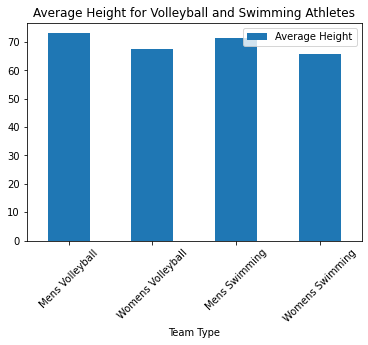

In [ ]:
average_heights_df.plot.bar(x ='Team Type', y = 'Average Height', rot= 45, title ='Average Height for Volleyball and Swimming Athletes')

In [ ]:
mens_volleyball_df

,Name,Height (inches)
0,Jeffrey Celis,69.0
1,Reng Chen,69.0
2,Edwin Fierros Gaytan,68.0
3,Fred De La Cuadra,70.0
4,Utpal Chand,69.0
...,...,...
127,Carter Burzlaff,79.0
128,Chase Celichowski,78.0
129,John Davis,77.0
130,Christian Prayer,76.0


In [ ]:
womens_volleyball_df

,Name,Height (inches)
0,Jaylina Kraker,59.0
1,Kaylin Nieves,62.0
2,Alyssa Duran,65.0
3,Vielka De Jesus Segura,67.0
4,Nolverys Fernandez,65.0
...,...,...
128,Hannah Lingold,70.0
129,Meghan Tennant,75.0
130,Samantha Arens-Ennis,65.0
131,Krystal Heffelfinger,71.0


In [ ]:
mens_swimming_df

,Name,Height (inches)
0,Daniel Angulo,71.597633
1,Anthony Attenborough,70.000000
2,Charles Cusumano,64.000000
3,Eslam Hussein,70.000000
4,Chris Ivanov,75.000000
...,...,...
166,Kieran Hassard,72.000000
167,Anthony Laite,69.000000
168,Drew MacDonald,72.000000
169,Kyle Morken,73.000000


In [ ]:
womens_swimming_df

,Name,Height (inches)
0,Kathleen Bridgman,65.0
1,Angye Galan,65.7
2,Jessica Johnson,68.0
3,Macy Jones-Busch,65.7
4,Bridget Mulvey,67.0
...,...,...
140,Paige Splendido,65.0
141,Emma Stephenson,67.0
142,Callie Stinson,64.0
143,Jessie Triller,62.0


In [ ]:
def tallest_five(team_type, dataframes):
    
    #creating and sorting a list of unique values in a pandas column in a descending order
    unique_heights = list(dataframes ['Height (inches)'].unique())
    unique_heights.sort (reverse = True)
    
    #creating and applying the filter mask to find all athletes taller than the fifth tallest athlete
    filter_mask = dataframes ['Height (inches)'] >= unique_heights [4]
    tallest = dataframes [filter_mask]
    return tallest.sort_values (by = 'Height (inches)', ascending = False, ignore_index = True)

#creating a new dataframe with the top five tallest heights and atheletes associated with such
tallest_mens_volleyball = tallest_five('Mens Volleyball',mens_volleyball_df)
tallest_womens_volleyball = tallest_five('Womens Volleyball',womens_volleyball_df)
tallest_mens_swimming = tallest_five('Mens Swimming',mens_swimming_df)
tallest_womens_swimming = tallest_five('Womens Swimming',womens_swimming_df)

In [ ]:
tallest_mens_volleyball

,Name,Height (inches)
0,Tyler Mitchem,83.0
1,Tyler Simpson,82.0
2,Mark Wickstrom,81.0
3,Michael Sack,81.0
4,Isaac Benka,81.0
5,Kevin Kauling,80.0
6,Max Roquet,80.0
7,Will Hippe,80.0
8,Antonio Rodriguez,80.0
9,Alec Lehnert,80.0


In [ ]:
tallest_womens_volleyball

,Name,Height (inches)
0,Meghan Tennant,75.0
1,Alyssa Daley,75.0
2,Molly Boyd,75.0
3,Sophie Bearden,75.0
4,Logan Garcia,74.0
5,McKenzie Eaves,74.0
6,Jessica Beckner,73.0
7,Anna Sommer,73.0
8,Radka Brichackova,73.0
9,Haley King,73.0


In [ ]:
tallest_mens_swimming

,Name,Height (inches)
0,Colton Grimes,78.0
1,Josh Templeton,78.0
2,Kasper Gacek,77.0
3,Eric Kroon,77.0
4,Jerry Brown,77.0
5,Zach Linder,77.0
6,Owen Brubaker,76.0
7,Xander Skinner,76.0
8,Evan Root,76.0
9,Gavin Wagner,76.0


In [ ]:
tallest_womens_swimming

,Name,Height (inches)
0,Kamilla Shulanova,72.0
1,Hallie Dixon,71.0
2,Isabella Gable,71.0
3,Claire Brouillet,71.0
4,Presley Heitzmann,71.0
5,Haley Rey,71.0
6,Shelby Kasse,70.0
7,Erin Clune,70.0
8,Stephanie Marks,70.0
9,Elle Christie,69.0


In [ ]:
def shortest_five(team_type, dataframes):
    
    #creating and sorting a list of unique values in a pandas column in a ascending order
    unique_heights = list(dataframes ['Height (inches)'].unique())
    unique_heights.sort (reverse = False)
    
    #creating and applying the filter mask to find all athletes shorter than the fifth shortest athlete
    filter_mask = dataframes ['Height (inches)'] <= unique_heights [4]
    shortest = dataframes [filter_mask]
    return shortest.sort_values (by = 'Height (inches)', ignore_index = True)

#creating a new dataframe with the top five shortest heights and atheletes associated with such
shortest_mens_volleyball = shortest_five('Mens Volleyball',mens_volleyball_df)
shortest_womens_volleyball = shortest_five('Womens Volleyball',womens_volleyball_df)
shortest_mens_swimming = shortest_five('Mens Swimming',mens_swimming_df)
shortest_womens_swimming = shortest_five('Womens Swimming',womens_swimming_df)

In [ ]:
shortest_mens_volleyball

,Name,Height (inches)
0,Juan Lemus,63.0
1,Bryce Glasper,64.0
2,Andrew Reza,66.0
3,Bryan Eng,66.0
4,Darren Roach,66.0
5,Evan Wandersee,67.0
6,Eliah Tull,67.0
7,Enmanuel Jaquez,67.0
8,Naoki Tani,67.0
9,Carlos Llivicura,67.0


In [ ]:
shortest_womens_volleyball

,Name,Height (inches)
0,Jaylina Kraker,59.0
1,Yeralkis Gomez,59.0
2,Kenndy Vasquez,59.0
3,Kiara Gonzalez,60.0
4,Ariana Serrano,60.0
5,Valeria Murillo,61.0
6,Iyanna Charon,61.0
7,Izabella De Lima,61.0
8,Kaylin Nieves,62.0
9,Kylana Laspina,62.0


In [ ]:
shortest_mens_swimming

,Name,Height (inches)
0,Charles Cusumano,64.0
1,Eric Li,64.0
2,Samuel De Leon,65.0
3,Joseph Scarpetta,65.0
4,Zachary Ciriaco,66.0
5,James Llewellyn,66.0
6,Ben Sionov,66.0
7,Christopher Egan,66.0
8,Devin Alejado,67.0
9,Arthur Souza,67.0


In [ ]:
shortest_womens_swimming

,Name,Height (inches)
0,Melanie Rodriguez,59.0
1,Micaela Reyes,59.0
2,Lillie Schafer,60.0
3,Asha Besaw,61.0
4,Cindy Daza,61.0
5,Kristen Flores,61.0
6,Rica De Leon,61.0
7,Danielle Shaw,61.0
8,Camila Mercado,61.0
9,Amanda Lee,61.0
